In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Data Understanding

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df["SeniorCitizen"].unique()

array([0, 1])

In [6]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [7]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [8]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [9]:
df["MonthlyCharges"].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [10]:
df["MonthlyCharges"].info

<bound method Series.info of 0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64>

In [11]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Cleaning

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [17]:
df["TotalCharges"].value_counts()

TotalCharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
130.15      1
3211.9      1
7843.55     1
2196.3      1
197.4       1
Name: count, Length: 6531, dtype: int64

In [18]:
# "coerce" parametresi sayesinde sayıya dönmeyen boşluklar NaN olur
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"] , errors = "coerce")

In [19]:
df["TotalCharges"].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [20]:
# eğer tenure 0 ise "TotalCharges" da 0 olmalıdır 
df.loc[df["tenure"] == 0 , "TotalCharges"] = 0

In [21]:
# hala kaldıysa geri kalanları da medyan ile doldurma işlemi yapacağız 
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [22]:
# veriyi ölçeklendirmeden önce aykırı değerlere karşı dayanıklı hale getirmemiz lazım 

from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()
df["TotalCharges_Scaled"] = r_scaler.fit_transform(df[["TotalCharges"]])

In [23]:
df.drop("customerID" , axis=1 , inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7043 non-null   object 
 1   SeniorCitizen        7043 non-null   int64  
 2   Partner              7043 non-null   object 
 3   Dependents           7043 non-null   object 
 4   tenure               7043 non-null   int64  
 5   PhoneService         7043 non-null   object 
 6   MultipleLines        7043 non-null   object 
 7   InternetService      7043 non-null   object 
 8   OnlineSecurity       7043 non-null   object 
 9   OnlineBackup         7043 non-null   object 
 10  DeviceProtection     7043 non-null   object 
 11  TechSupport          7043 non-null   object 
 12  StreamingTV          7043 non-null   object 
 13  StreamingMovies      7043 non-null   object 
 14  Contract             7043 non-null   object 
 15  PaperlessBilling     7043 non-null   o

In [25]:
df.duplicated().sum()

np.int64(22)

In [26]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Scaled
964,Male,0,No,No,1,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes,-0.398120
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,-0.405661
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No,-0.405838
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes,-0.390977
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No,-0.405646
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No,-0.405573
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No,-0.405573
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes,-0.391066
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No,-0.405691
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes,-0.405646


In [27]:
df[df.duplicated(keep=False)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Scaled
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,-0.405661
100,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No,-0.405646
542,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No,-0.405838
646,Male,0,No,No,1,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes,-0.398120
662,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No,-0.405691
690,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No,-0.405573
964,Male,0,No,No,1,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes,-0.398120
976,Male,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes,-0.390977
1243,Male,0,No,No,1,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,No,Electronic check,45.30,45.30,Yes,-0.398238
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,-0.405661


In [28]:
df = df.drop_duplicates()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7021 non-null   object 
 1   SeniorCitizen        7021 non-null   int64  
 2   Partner              7021 non-null   object 
 3   Dependents           7021 non-null   object 
 4   tenure               7021 non-null   int64  
 5   PhoneService         7021 non-null   object 
 6   MultipleLines        7021 non-null   object 
 7   InternetService      7021 non-null   object 
 8   OnlineSecurity       7021 non-null   object 
 9   OnlineBackup         7021 non-null   object 
 10  DeviceProtection     7021 non-null   object 
 11  TechSupport          7021 non-null   object 
 12  StreamingTV          7021 non-null   object 
 13  StreamingMovies      7021 non-null   object 
 14  Contract             7021 non-null   object 
 15  PaperlessBilling     7021 non-null   object

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalCharges_Scaled
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2286.765026,0.263342
std,0.368947,24.534965,30.069001,2266.855057,0.669074
min,0.000000,0.000000,18.250000,0.000000,-0.411608
25%,0.000000,9.000000,35.750000,403.350000,-0.292558
50%,0.000000,29.000000,70.400000,1400.550000,0.001771
75%,0.000000,55.000000,89.900000,3801.700000,0.710482
max,1.000000,72.000000,118.750000,8684.800000,2.151754


# EDA (Keşifçi Veri Analizi)

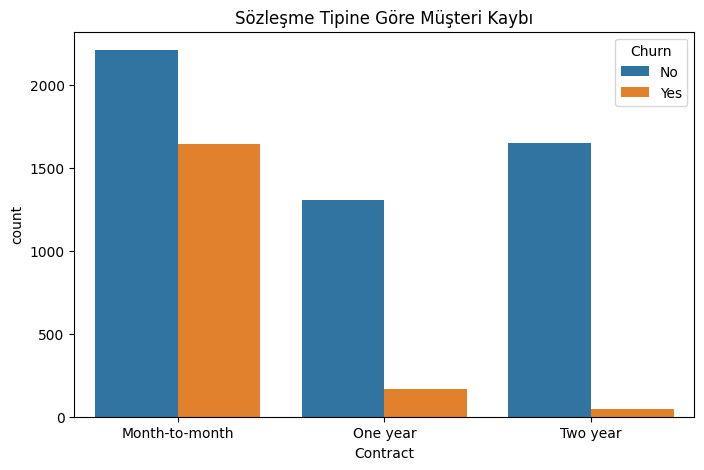

In [31]:
#Sözleşme Tipi (Contract) Gitme Oranını Nasıl Etkiliyor?
plt.figure(figsize=(8,5))
sns.countplot(x = "Contract" , hue = "Churn" , data=df)
plt.title("Sözleşme Tipine Göre Müşteri Kaybı")
plt.show()

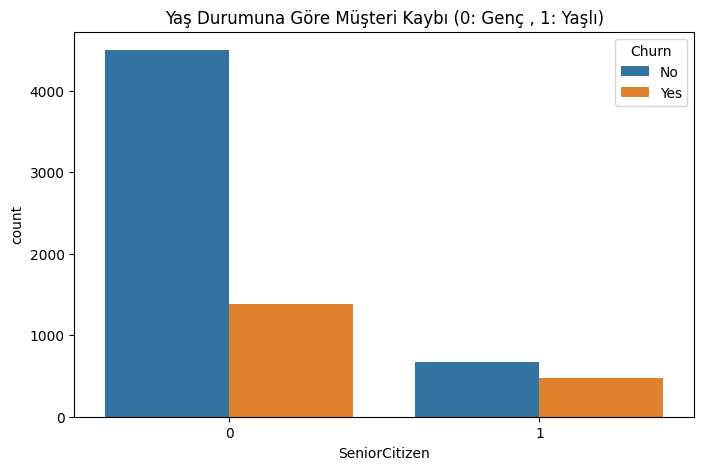

In [32]:
#Yaşlı Müşteriler (SeniorCitizen) Daha mı Çok Ayrılıyor?
plt.figure(figsize=(8,5))
sns.countplot(x = "SeniorCitizen" , hue = "Churn" , data=df)
plt.title("Yaş Durumuna Göre Müşteri Kaybı (0: Genç , 1: Yaşlı)")
plt.show()

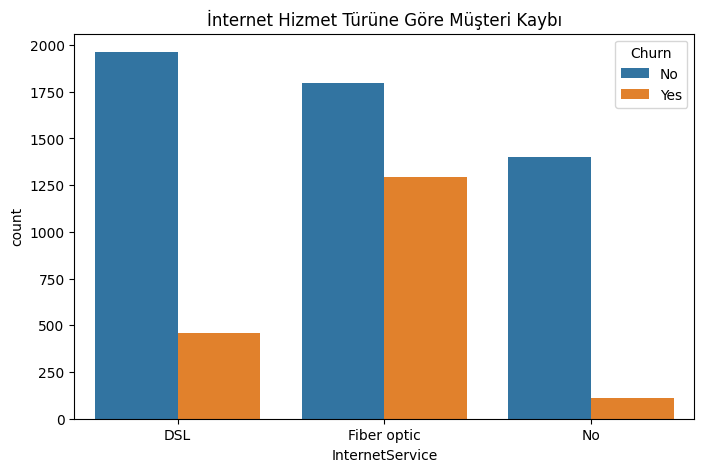

In [33]:
#İnternet Hizmet Türü Churn Oranını Nasıl Değiştiriyor?
plt.figure(figsize=(8,5))
sns.countplot( x = "InternetService" , hue = "Churn" , data = df)
plt.title("İnternet Hizmet Türüne Göre Müşteri Kaybı")
plt.show()

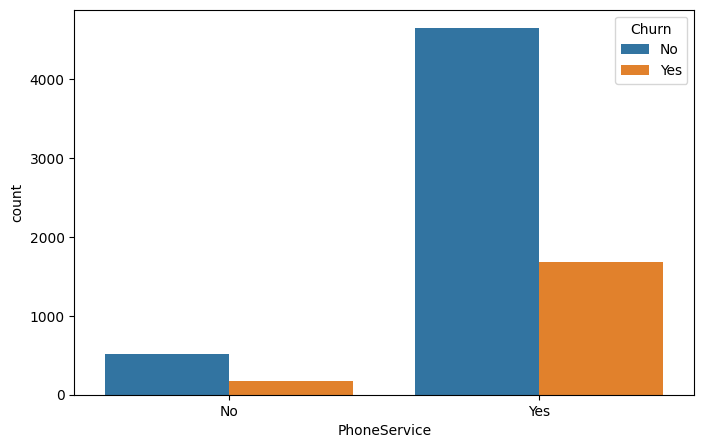

In [34]:
plt.figure(figsize=(8,5))
sns.countplot( x = "PhoneService" , hue = "Churn" , data = df)
plt.show()

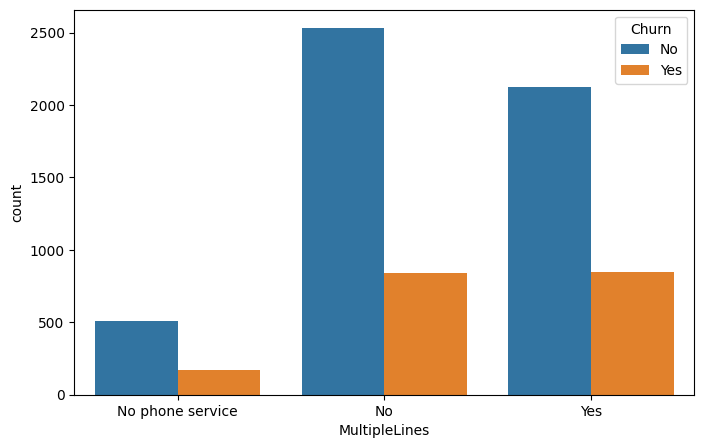

In [35]:
plt.figure(figsize=(8,5))
sns.countplot( x = "MultipleLines" , hue = "Churn" , data = df)
plt.show()

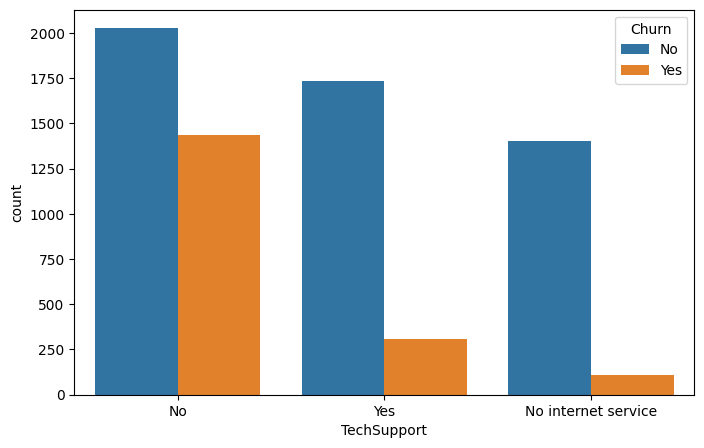

In [36]:
plt.figure(figsize=(8,5))
sns.countplot( x = "TechSupport" , hue = "Churn" , data = df)
plt.show()

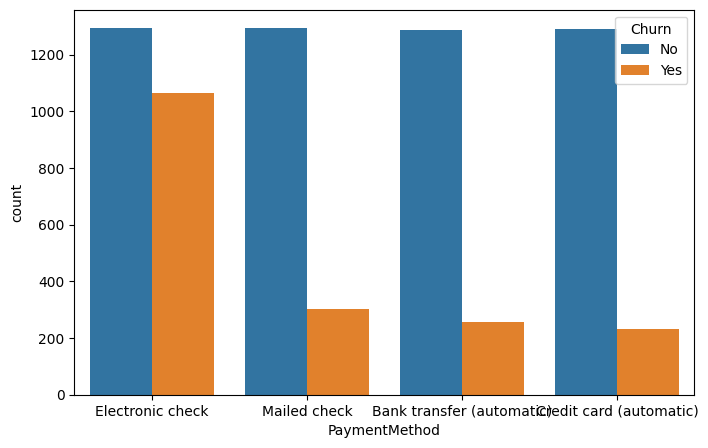

In [37]:
plt.figure(figsize=(8,5))
sns.countplot( x = "PaymentMethod" , hue = "Churn" , data = df)
plt.show()

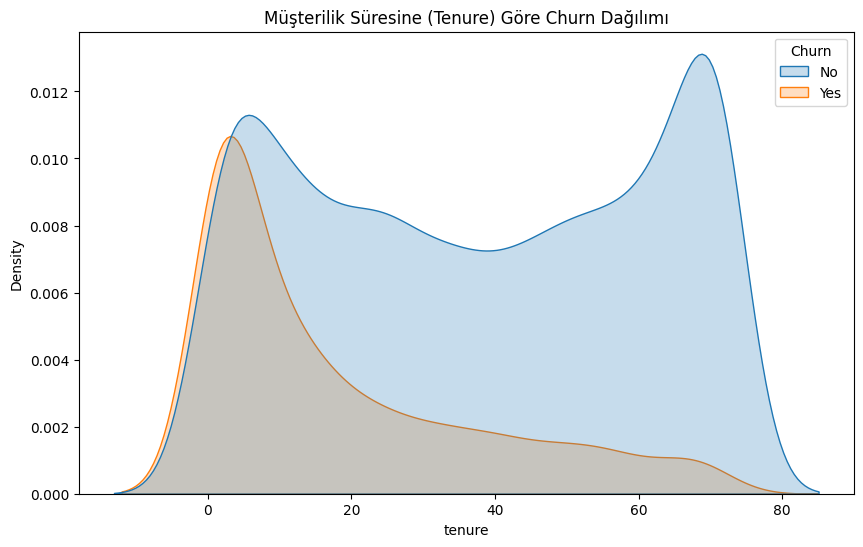

In [38]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="tenure", hue="Churn", shade=True)
plt.title("Müşterilik Süresine (Tenure) Göre Churn Dağılımı")
plt.show()

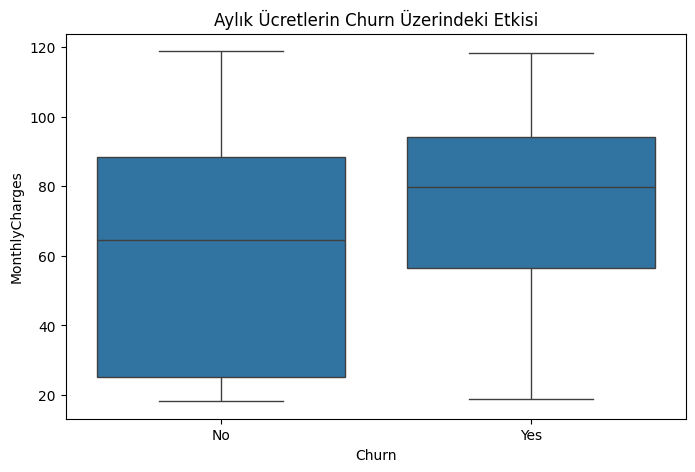

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Aylık Ücretlerin Churn Üzerindeki Etkisi")
plt.show()

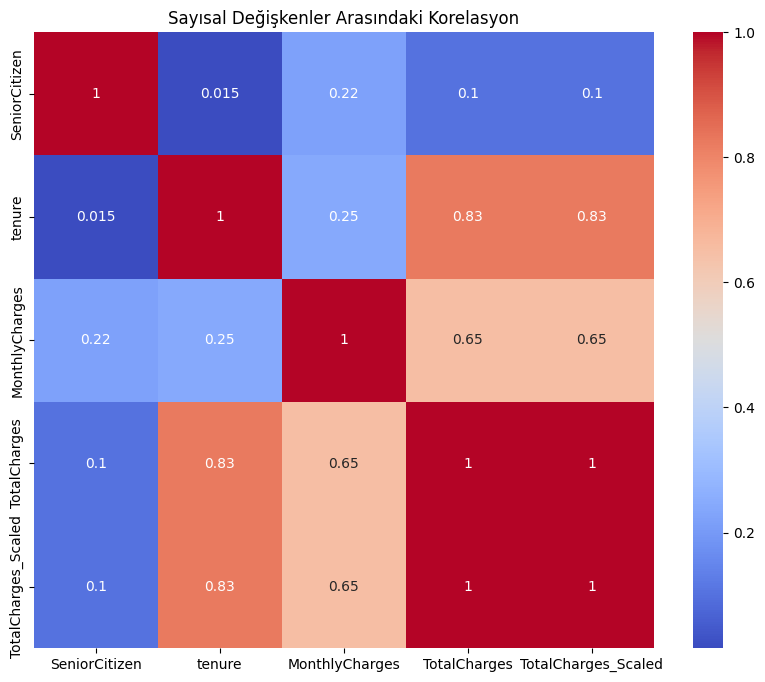

In [40]:
plt.figure(figsize=(10, 8))
# Sadece sayısal sütunları seçip korelasyonuna bakıyoruz
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Sayısal Değişkenler Arasındaki Korelasyon")
plt.show()

Churn
No     5164
Yes    1857
Name: count, dtype: int64


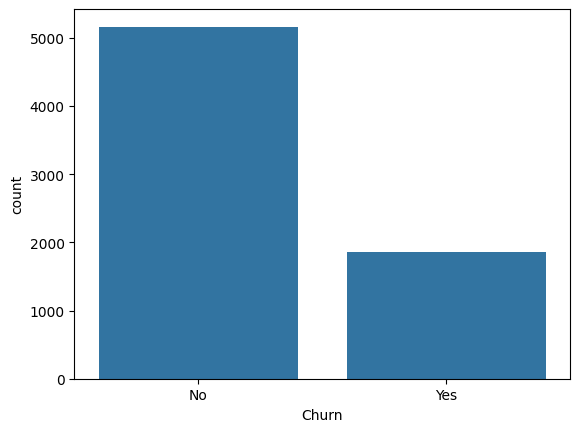

In [41]:
print(df["Churn"].value_counts())
sns.countplot(x="Churn", data=df)
plt.show()

# Preprocessing

In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [43]:
label_encoder = LabelEncoder()

In [44]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

In [45]:
for col in binary_cols : 
    df[col] = label_encoder.fit_transform(df[col])

In [46]:
multi_categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                          'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [47]:
df = pd.get_dummies(df , columns=multi_categorical_cols)

In [48]:
scaler = StandardScaler()

In [49]:
numeric_cols = ["tenure" , "MonthlyCharges" , "TotalCharges"]

In [50]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [51]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.282728,0,1,-1.164135,-0.995686,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,0.062387,1,0,-0.262811,-0.175262,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,-1.241967,1,1,-0.365914,-0.961142,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,0.510759,0,0,-0.750058,-0.196769,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,-1.241967,1,1,0.194503,-0.941951,1,...,True,False,False,True,False,False,False,False,True,False


In [52]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalCharges_Scaled
count,7021.000000,7021.000000,7021.000000,7021.000000,7.021000e+03,7021.000000,7021.000000,7.021000e+03,7.021000e+03,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,8.855219e-17,0.902863,0.592651,-2.105012e-16,-4.250505e-17,0.264492,0.263342
std,0.500017,0.368947,0.499797,0.458520,1.000071e+00,0.296166,0.491376,1.000071e+00,1.000071e+00,0.441094,0.669074
min,0.000000,0.000000,0.000000,0.000000,-1.323489e+00,0.000000,0.000000,-1.549942e+00,-1.008855e+00,0.000000,-0.411608
25%,0.000000,0.000000,0.000000,0.000000,-9.566397e-01,1.000000,0.000000,-9.679060e-01,-8.309085e-01,0.000000,-0.292558
50%,1.000000,0.000000,0.000000,0.000000,-1.414184e-01,1.000000,1.000000,1.845256e-01,-3.909726e-01,0.000000,0.001771
75%,1.000000,0.000000,1.000000,1.000000,9.183692e-01,1.000000,1.000000,8.330802e-01,6.683457e-01,1.000000,0.710482
max,1.000000,1.000000,1.000000,1.000000,1.611307e+00,1.000000,1.000000,1.792608e+00,2.822629e+00,1.000000,2.151754


In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Önce veriyi X (özellikler) ve y (hedef - Churn) olarak ayıralım
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Veriyi Eğitim ve Test olarak bölelim (%80 Eğitim, %20 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. SMOTE nesnesini oluşturalım
smote = SMOTE(random_state=42)

# 4. Sadece EĞİTİM verisine SMOTE uygulayalım
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Sonucu kontrol edelim
print("SMOTE Öncesi Sınıf Dağılımı:", y_train.value_counts().to_dict())
print("SMOTE Sonrası Sınıf Dağılımı:", y_train_resampled.value_counts().to_dict())

SMOTE Öncesi Sınıf Dağılımı: {0: 4111, 1: 1505}
SMOTE Sonrası Sınıf Dağılımı: {1: 4111, 0: 4111}


In [54]:
df["Churn"].info()

<class 'pandas.core.series.Series'>
Index: 7021 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7021 non-null   int64
dtypes: int64(1)
memory usage: 109.7 KB


# Modeling

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# --- MODEL 1: LOJİSTİK REGRESYON ---
log_model = LogisticRegression()
log_model.fit(X_train_resampled, y_train_resampled) 

# --- MODEL 2: RANDOM FOREST ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled) 



RandomForestClassifier(random_state=42)

In [56]:

log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)


print("Lojistik Regresyon Doğruluk Skoru:", accuracy_score(y_test, log_pred))
print("Random Forest Doğruluk Skoru:", accuracy_score(y_test, rf_pred))

Lojistik Regresyon Doğruluk Skoru: 0.7736654804270463
Random Forest Doğruluk Skoru: 0.7658362989323844


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


multi_log_model = LogisticRegression(max_iter=1000) 

# 2. Modeli Eğitme (SMOTE ile dengelenmiş veriyi kullanıyoruz)
multi_log_model.fit(X_train_resampled, y_train_resampled)

# 3. Tahmin Yapma
y_pred = multi_log_model.predict(X_test)

# 4. İlk Sonuçlar
print(f"Çoklu Lojistik Regresyon Doğruluk Skoru: %{accuracy_score(y_test, y_pred)*100:.2f}")

Çoklu Lojistik Regresyon Doğruluk Skoru: %77.15


In [58]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train_resampled, y_train_resampled)

# 2. Test Seti Üzerinde Tahmin Yapma (Sayısal sonuçlar dönecek)
lin_pred = lin_model.predict(X_test)

# İlk 5 tahmine bakalım
print("Lineer Regresyon İlk 5 Tahmin Skoru (Risk Skoru):")
print(lin_pred[:5])

Lineer Regresyon İlk 5 Tahmin Skoru (Risk Skoru):
[ 0.6863595   0.33918674  0.09688058 -0.00560564  0.4699078 ]


In [59]:
# Eğer risk 0.5'ten büyükse 1 (Gider), küçükse 0 (Kalır) de
lin_pred_class = [1 if x >= 0.5 else 0 for x in lin_pred]

from sklearn.metrics import accuracy_score
print(f"Lineer Regresyonun Sınıflandırma Doğruluğu: %{accuracy_score(y_test, lin_pred_class)*100:.2f}")

Lineer Regresyonun Sınıflandırma Doğruluğu: %76.80


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


log_reg = LogisticRegression(max_iter=1000)

# 2. Modeli Eğitelim (SMOTE yapılmış verilerle)
log_reg.fit(X_train_resampled, y_train_resampled)

# 3. Test Verileri Üzerinde Tahmin Yapalım
y_pred = log_reg.predict(X_test)         
y_probs = log_reg.predict_proba(X_test)  

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1053
           1       0.53      0.70      0.61       352

    accuracy                           0.77      1405
   macro avg       0.71      0.75      0.72      1405
weighted avg       0.80      0.77      0.78      1405



In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='rbf', probability=True, random_state=42)


svm_model.fit(X_train_resampled, y_train_resampled)


y_pred_svm = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1053
           1       0.53      0.70      0.61       352

    accuracy                           0.77      1405
   macro avg       0.71      0.75      0.72      1405
weighted avg       0.80      0.77      0.78      1405



In [62]:

print(f"SVM Doğruluk Skoru: %{accuracy_score(y_test, y_pred_svm)*100:.2f}")


print("\nSVM Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_svm))

SVM Doğruluk Skoru: %76.87

SVM Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1053
           1       0.53      0.66      0.59       352

    accuracy                           0.77      1405
   macro avg       0.70      0.73      0.71      1405
weighted avg       0.79      0.77      0.78      1405



In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


nb_model = GaussianNB()


nb_model.fit(X_train_resampled, y_train_resampled)


y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Modeli Başarıyla Eğitildi!")

print(f"Naive Bayes Doğruluk Skoru: %{accuracy_score(y_test, y_pred_nb)*100:.2f}")


print("\nNaive Bayes Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Modeli Başarıyla Eğitildi!
Naive Bayes Doğruluk Skoru: %69.61

Naive Bayes Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1053
           1       0.44      0.86      0.59       352

    accuracy                           0.70      1405
   macro avg       0.69      0.75      0.67      1405
weighted avg       0.81      0.70      0.72      1405



In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(X_train_resampled, y_train_resampled)


y_pred_knn = knn_model.predict(X_test)


print(f"KNN Doğruluk Skoru: %{accuracy_score(y_test, y_pred_knn)*100:.2f}")


print("\nKNN Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_knn))

KNN Doğruluk Skoru: %73.74

KNN Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1053
           1       0.48      0.70      0.57       352

    accuracy                           0.74      1405
   macro avg       0.68      0.72      0.69      1405
weighted avg       0.78      0.74      0.75      1405



In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)


tree_model.fit(X_train_resampled, y_train_resampled)


y_pred_tree = tree_model.predict(X_test)

print(f" Karar Ağaçları Algoritması Doğruluk Skoru: %{accuracy_score(y_test, y_pred_tree)*100:.2f}")


print("\nKarar Ağaçları Algoritması Raporu:")
print(classification_report(y_test, y_pred_tree))

 Karar Ağaçları Algoritması Doğruluk Skoru: %73.52

Karar Ağaçları Algoritması Raporu:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1053
           1       0.48      0.70      0.57       352

    accuracy                           0.74      1405
   macro avg       0.68      0.72      0.69      1405
weighted avg       0.78      0.74      0.75      1405



# Model Evaluation

In [66]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score


models = {
    "Logistic Regression": log_reg,
    "SVM": svm_model,
    "Naive Bayes": nb_model,
    "KNN": knn_model,
    "Decision Tree": tree_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (Gidenleri Yakalama)": recall_score(y_test, y_pred),
        "Precision (Hata Yapmama)": precision_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })


df_results = pd.DataFrame(results).sort_values(by="Recall (Gidenleri Yakalama)", ascending=False)
print(df_results)

                 Model  Accuracy  Recall (Gidenleri Yakalama)  \
2          Naive Bayes  0.696085                     0.857955   
0  Logistic Regression  0.771530                     0.698864   
3                  KNN  0.737367                     0.696023   
4        Decision Tree  0.735231                     0.696023   
1                  SVM  0.768683                     0.659091   

   Precision (Hata Yapmama)   ROC-AUC  
2                  0.444772  0.815557  
0                  0.533623  0.841713  
3                  0.483235  0.779457  
4                  0.480392  0.817200  
1                  0.530892  0.812821  


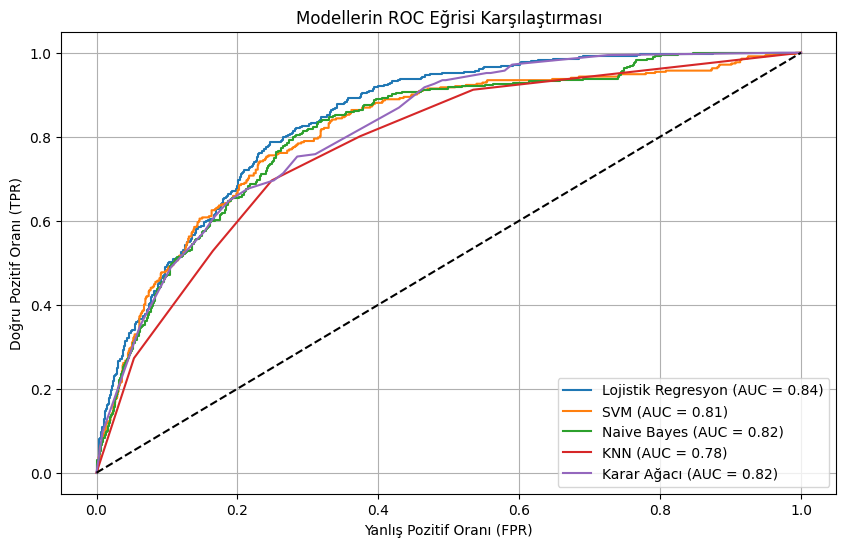

In [67]:

from sklearn.metrics import roc_curve, auc


model_list = {
    "Lojistik Regresyon": log_reg,
    "SVM": svm_model,
    "Naive Bayes": nb_model,
    "KNN": knn_model,
    "Karar Ağacı": tree_model
}

plt.figure(figsize=(10, 6))

for name, model in model_list.items():
    
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.title('Modellerin ROC Eğrisi Karşılaştırması')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve.png')

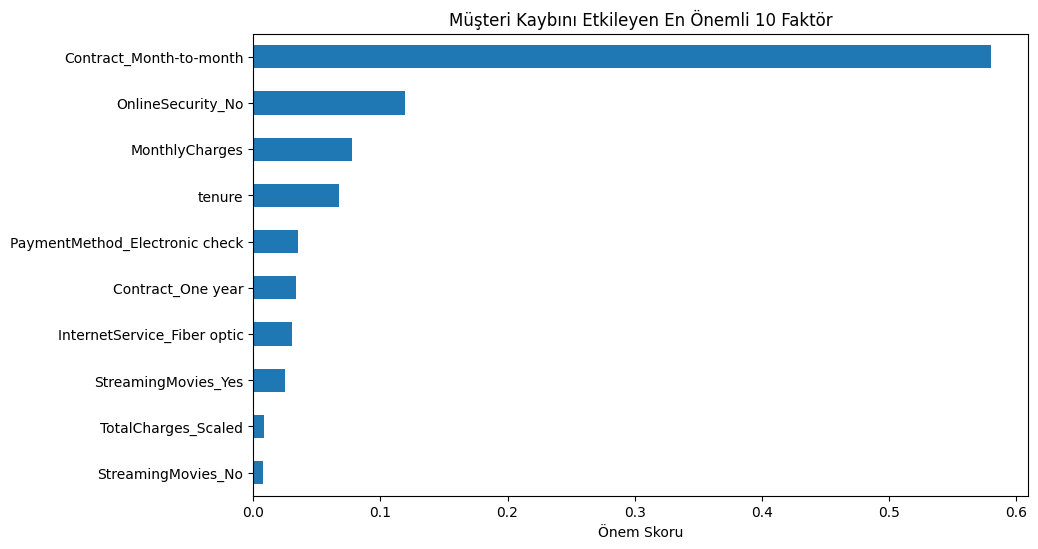

In [68]:


importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 6))

plt.title('Müşteri Kaybını Etkileyen En Önemli 10 Faktör')
plt.xlabel('Önem Skoru')
plt.savefig('feature_importance.png')